In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor,HuberRegressor, LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


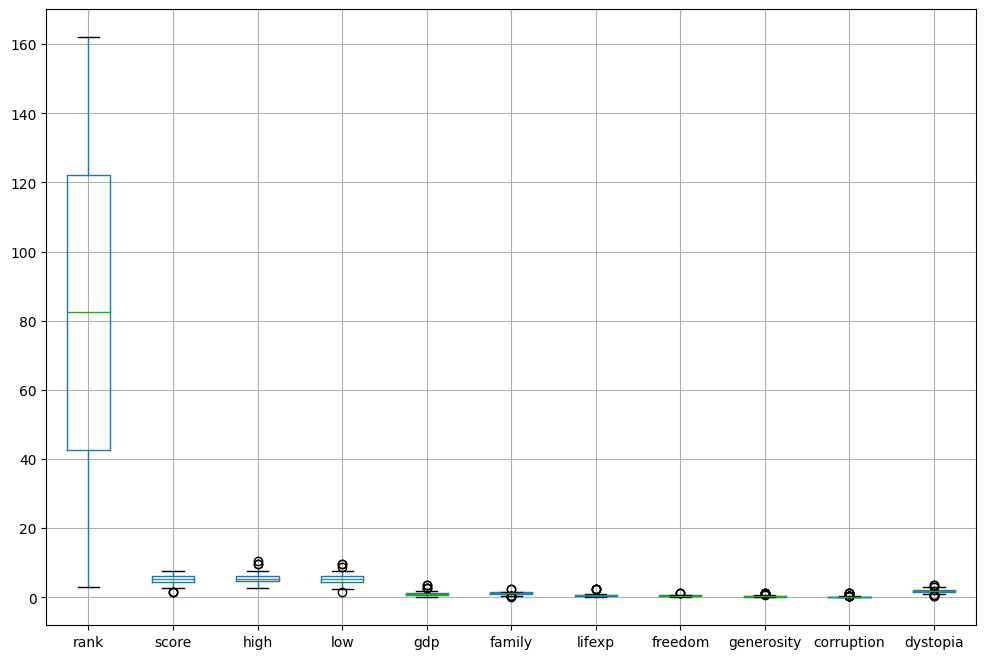

In [10]:
data=pd.read_csv('./data/whr2017Corrupted.csv')
data=data[data['score']< 3000]
X= data.drop(['country','score','rank'], axis=1)
y= data['score']
plt.figure(figsize=(12,8))
data.boxplot()
plt.show()




## Empleando DBScan Para Ubicar Atipicos 

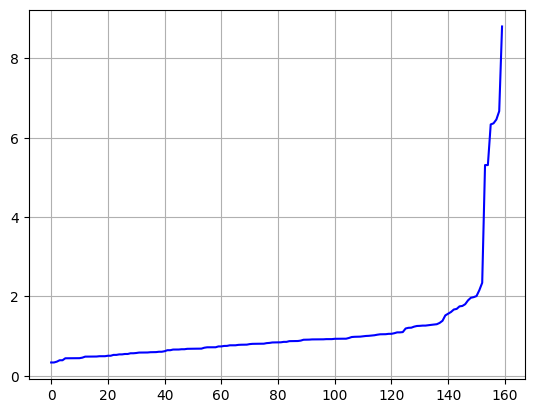

In [11]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

X_scaled=StandardScaler().fit_transform(X)
vecinos=NearestNeighbors(n_neighbors=3)
vecinos_fit=vecinos.fit(X_scaled)
distances,indices = vecinos_fit.kneighbors(X_scaled)
distancias= np.sort(distances,axis=0)
plt.plot(distancias[:,1],color='blue')
plt.grid()
plt.show()

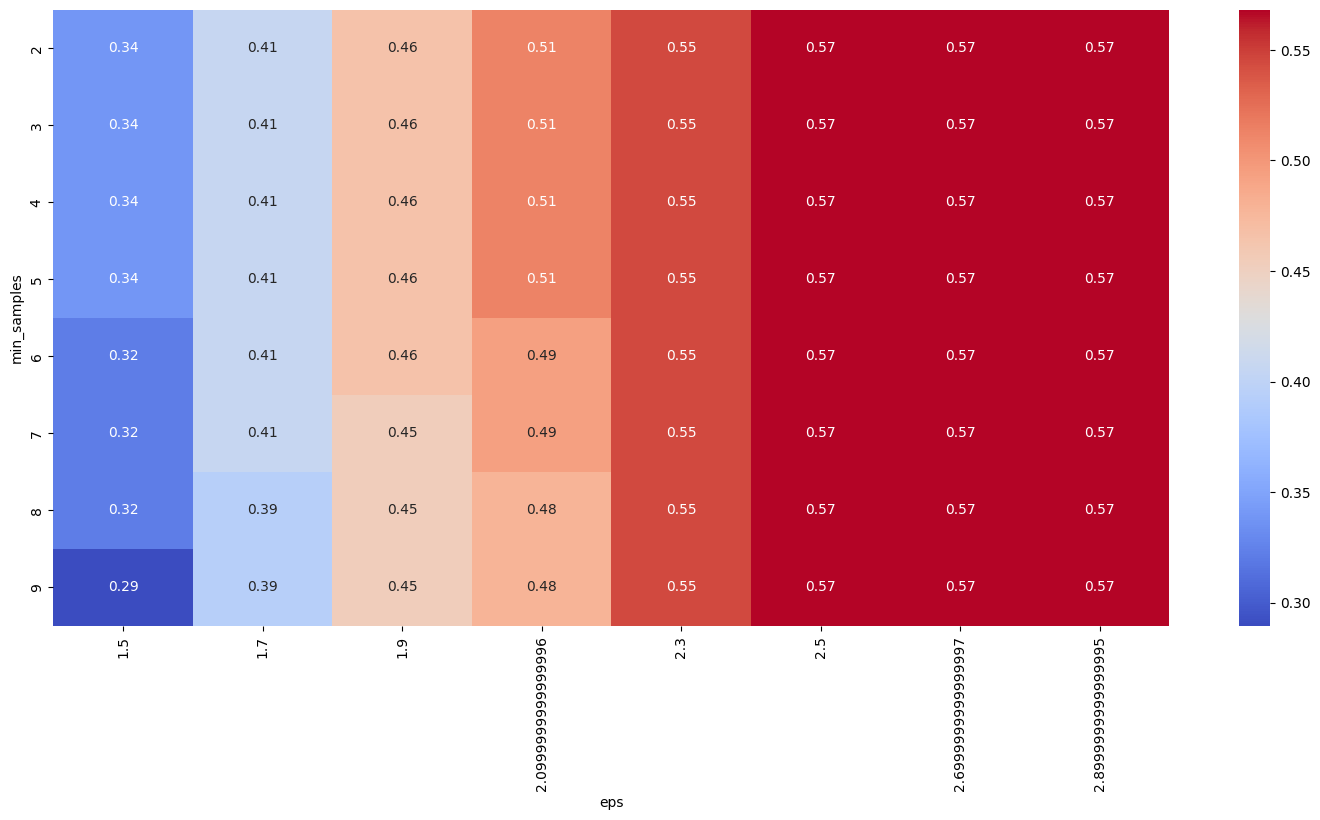

In [12]:
eps_values=np.arange(1.5,3, 0.2)
min_samples = np.arange(2,10)

from itertools import product
paramgrid=list(product(eps_values,min_samples))
sil_scores=[]

for p in paramgrid:
    clusters=DBSCAN(eps=p[0],min_samples=p[1]).fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X,clusters))


df_tunning=pd.DataFrame.from_records(paramgrid,columns=['eps','min_samples'])
df_tunning['sil_scores']= sil_scores

heatmaptable= pd.pivot_table(df_tunning,values='sil_scores',index='min_samples',columns='eps')

plt.figure(figsize=(18,8))
sns.heatmap(heatmaptable, annot=True, cmap='coolwarm')
plt.show()

In [13]:
clusters=DBSCAN(eps=2.5,min_samples=2).fit_predict(X_scaled)
data['Cluster']=clusters
print(data['Cluster'].value_counts())
data_noise=data[data['Cluster']==-1]
data_noise.head(7)

Cluster
 0    153
-1      7
Name: count, dtype: int64


,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia,Cluster
24,Zootopia,25,6.612,2.586428,2.631572,2.654657,0.371681,2.353141,0.212884,1.169656,1.096026,3.553362,-1
111,One Repubic,112,4.612,5.586428,9.631572,2.654657,1.371681,2.353141,0.212884,1.169656,0.096026,1.553362,-1
157,Hyrule,158,2.612,9.586428,6.631572,1.654657,2.371681,0.353141,0.212884,1.169656,1.096026,2.553362,-1
158,Kingdom Hearts,159,2.612,3.586428,1.631572,3.654657,1.371681,2.353141,0.212884,0.169656,0.096026,1.553362,-1
159,Polombia,160,1.612,9.586428,9.631572,2.654657,1.371681,2.353141,1.212884,1.169656,1.096026,1.553362,-1
160,United States of Europe,161,1.612,3.586428,4.631572,1.654657,0.371681,0.353141,1.212884,0.169656,1.096026,2.553362,-1
161,Mushrom Kingdom,162,1.612,10.586428,8.631572,3.654657,2.371681,2.353141,1.212884,1.169656,1.096026,3.553362,-1


El MSE para el SVR es : 0.020719013782582774


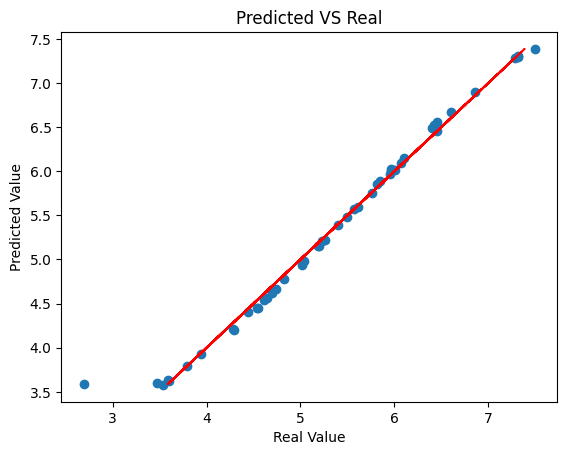

El MSE para el RANSAC es : 1.4786447528322039e-19


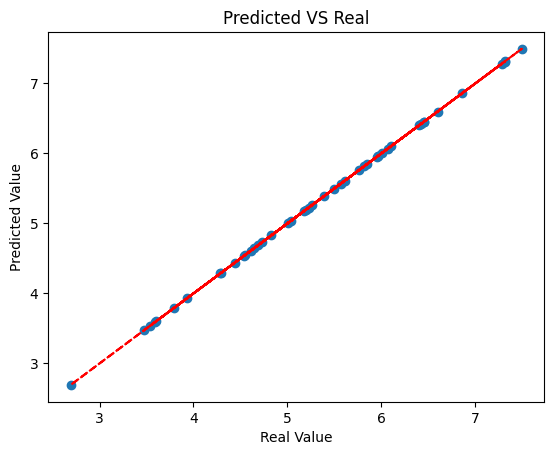

El MSE para el HUBER es : 5.156608081741751e-10


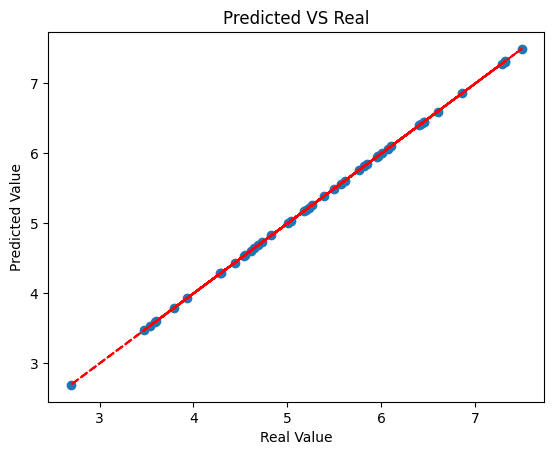

El MSE para el LINEAR es : 1.4786454665834759e-19


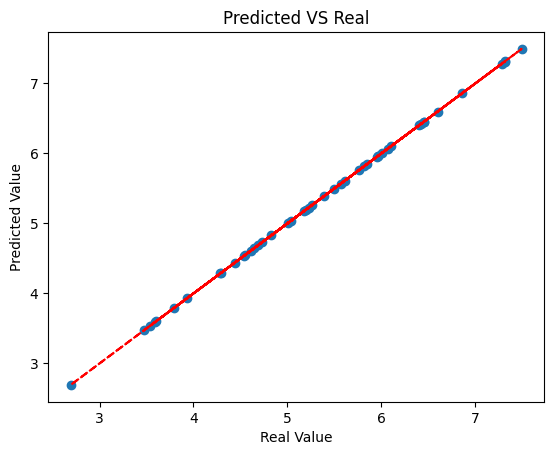

In [14]:
X= data[data['Cluster']==0]
y= X['score']
X= X.drop(['country','score','rank'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=44)
estimators={ 
    'SVR': SVR(gamma='auto',C=1,epsilon=0.1),
    'RANSAC': RANSACRegressor(),
    'HUBER': HuberRegressor(epsilon=1,max_iter=1000),
    'LINEAR': LinearRegression()
}

for type , estimator in estimators.items():
    estimator.fit(X_train,y_train)
    yp = estimator.predict(X_test)
    print('=='*60)
    print(f'El MSE para el {type} es : {mean_squared_error(y_test,yp)}')    
    plt.ylabel('Predicted Value')
    plt.xlabel('Real Value')
    plt.title('Predicted VS Real')
    plt.scatter(y_test, yp)
    plt.plot(yp, yp,'r--')
    plt.show()
    print('=='*60)

El MSE para el SVR es : 0.48459489113409937


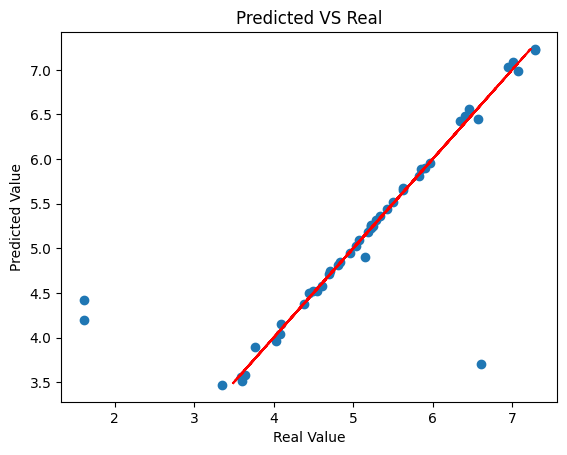

El MSE para el RANSAC es : 6.377852913844284


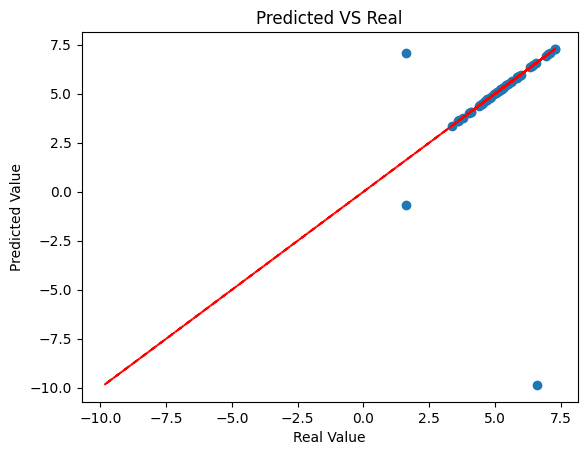

El MSE para el HUBER es : 1.7995563040731593


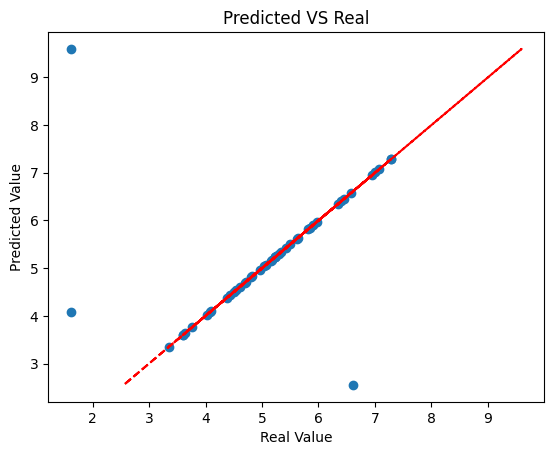

El MSE para el LINEAR es : 3.4575642075383968


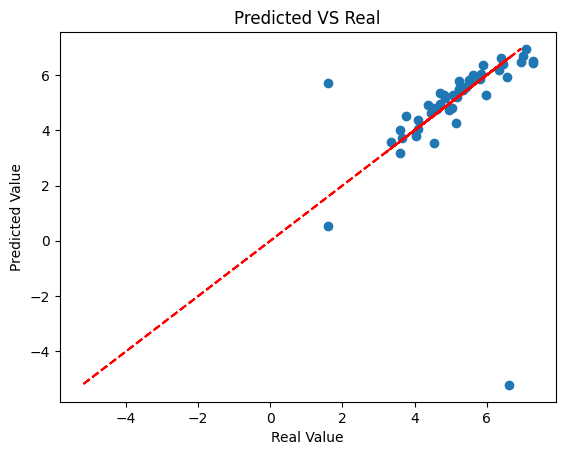

In [15]:
y= data['score']
X= data.drop(['country','score','rank','Cluster'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=55)
estimators={ 
    'SVR': SVR(gamma='auto',C=1,epsilon=0.1),
    'RANSAC': RANSACRegressor(),
    'HUBER': HuberRegressor(epsilon=1,max_iter=1000),
    'LINEAR': LinearRegression()
}
for type , estimator in estimators.items():
    estimator.fit(X_train,y_train)
    yp = estimator.predict(X_test)
    print(f'El MSE para el {type} es : {mean_squared_error(y_test,yp)}')
    plt.ylabel('Predicted Value')
    plt.xlabel('Real Value')
    plt.title('Predicted VS Real')
    plt.scatter(y_test, yp)
    plt.plot(yp, yp,'r--')
    plt.show()